In [1]:
import sys
sys.path.append("../")

from VQD_CAFQA import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    

In [2]:
def getHeH(d):
    return molecule(f"He 0 0 0; H 0 0 {d}",charge=1)

In [3]:
CAFQA_parameterList = []
CAFQA_energiesList = []

for d in np.linspace(0.5,2,7):
    coeffs,paulis,initial=getHeH(d)
    ansatz = efficientsu2(n_qubits=2,repetitions=2,initial=initial)
    save_dir = 'HeH_Distance_' + str(d)
    k = 4
    energies,paramList = run_cafqa_vqd(coeffs=coeffs,paulis=paulis,ansatz=ansatz,iterations=500,save_dir=save_dir,name='HeH_Distance: ' + str(d),k=4)
    CAFQA_parameterList.append(paramList)
    CAFQA_energiesList.append(energies)

 /opt/conda/lib/python3.10/site-packages/pyscf/dft/libxc.py:772: UserWarning:Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
 /opt/conda/lib/python3.10/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning:PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.


In [4]:
D=[]
for d in np.linspace(0.5,2,100):
    coeffs,paulis,_ = getHeH(d)
    D.append(get_energies(coeffs,paulis))

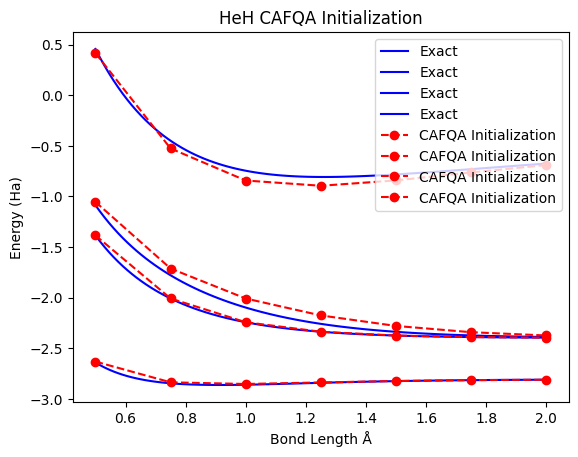

In [5]:
plt.plot(np.linspace(0.5,2,100),D,'-',color='blue',label='Exact')
plt.plot(np.linspace(0.5,2,7),CAFQA_energiesList,'r--o',label="CAFQA Initialization")
plt.xlabel('Bond Length Å')
plt.ylabel('Energy (Ha)')
plt.title('HeH CAFQA Initialization')
plt.legend()